# Linear Regression using Regularization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
boston_dataset = datasets.load_boston()

In [ ]:
# load the dataset
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)


In [19]:
# input
X = boston_pd.iloc[:, :-1]

# output
Y = boston_pd.iloc[:,-1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [22]:
# slpit data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25)

print("Train data shape of X = % s and Y = % s :" %(x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s :" %(x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) :
Test data shape of X = (127, 13) and Y = (127,) :


In [31]:
# apply multiple linear regression model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate prediction on test set
lreg_y_predict = lreg.predict(x_test)

# caculation Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_predict - y_test)**2)
print("Mean square error on test: ", mean_squared_error)

# Putting together the coefficient and their corrspondoing variable names
lreg_coeff = pd.DataFrame()
lreg_coeff["Columns1"] = x_train.columns
lreg_coeff["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(lreg_coeff)

Mean square error on test:  18.698548531638572
   Columns1  Coefficient Estimate
0      CRIM             -0.098793
1        ZN              0.064171
2     INDUS              0.024694
3      CHAS              2.526206
4       NOX            -18.437787
5        RM              3.171748
6       AGE              0.002424
7       DIS             -1.519205
8       RAD              0.314624
9       TAX             -0.011914
10  PTRATIO             -0.972347
11        B              0.008966
12    LSTAT             -0.553779


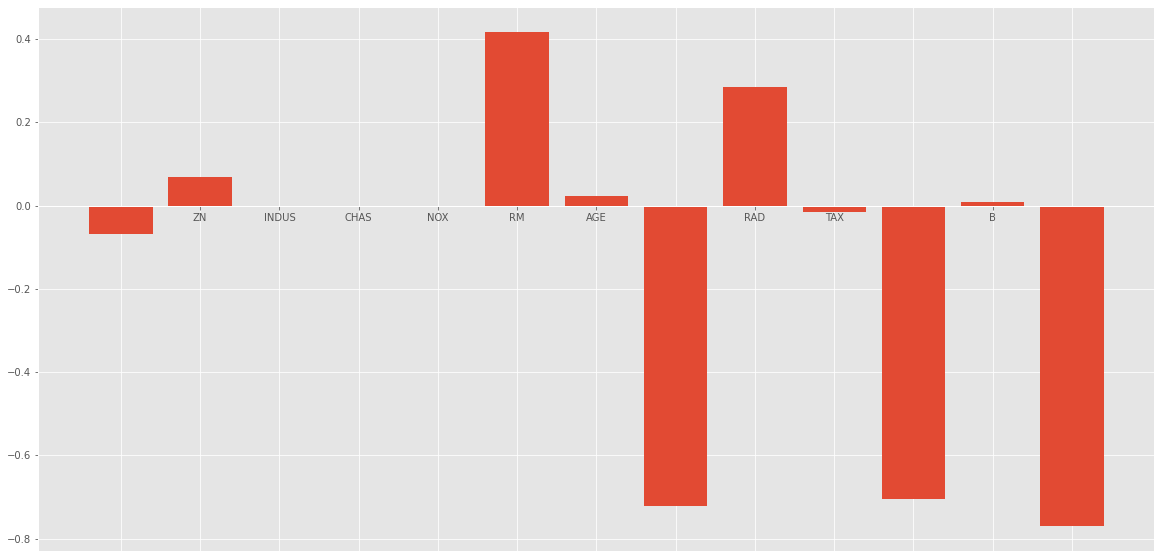

In [44]:
# ploting the coefficien score of lreg
fig, ax = plt.subplots(figsize = (20, 10))

ax.bar(lreg_coeff["Columns1"], lasso_coeff['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [36]:
# import ridge regreesion from sklearn library
# ridge is norm 2 try to fit model of all feature with small Weight
from sklearn.linear_model import Ridge

# Train model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# caculation Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean square error on test: ", mean_squared_error)

# Putting together the coefficient and their corrspondoing variable names
ridgeR_coeff = pd.DataFrame()
ridgeR_coeff["Columns1"] = x_train.columns
ridgeR_coeff["Coefficient Estimate"] = pd.Series(ridgeR.coef_)
print(ridgeR_coeff)

Mean square error on test:  18.823270987758658
   Columns1  Coefficient Estimate
0      CRIM             -0.095125
1        ZN              0.065646
2     INDUS             -0.008841
3      CHAS              2.360580
4       NOX            -10.087617
5        RM              3.212789
6       AGE             -0.004654
7       DIS             -1.399719
8       RAD              0.297282
9       TAX             -0.012724
10  PTRATIO             -0.867976
11        B              0.009241
12    LSTAT             -0.565706


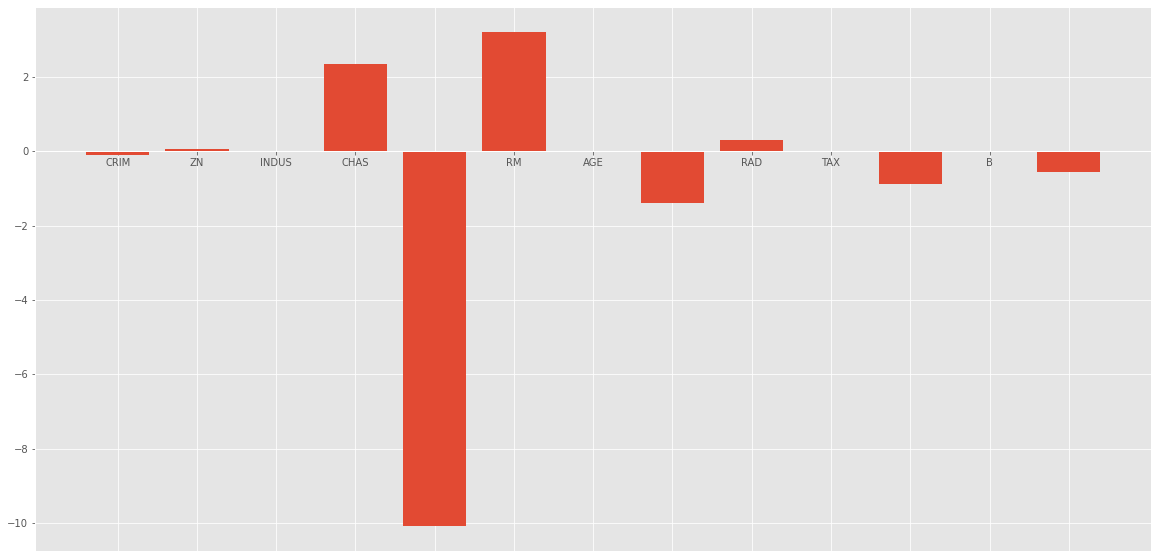

In [45]:
# ploting the coefficien score of ridge
fig, ax = plt.subplots(figsize = (20, 10))

ax.bar(ridgeR_coeff["Columns1"], ridgeR_coeff['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [37]:
# import lasso regreesion from sklearn library
# Lasso is Norm1 - try to eliminate some feature less useful
from sklearn.linear_model import Lasso

# Train model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# caculation Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean square error on test: ", mean_squared_error)

# Putting together the coefficient and their corrspondoing variable names
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns1"] = x_train.columns
lasso_coeff["Coefficient Estimate"] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean square error on test:  27.439073781985297
   Columns1  Coefficient Estimate
0      CRIM             -0.067455
1        ZN              0.069847
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.417528
6       AGE              0.022227
7       DIS             -0.720922
8       RAD              0.284232
9       TAX             -0.015271
10  PTRATIO             -0.704883
11        B              0.008170
12    LSTAT             -0.770051


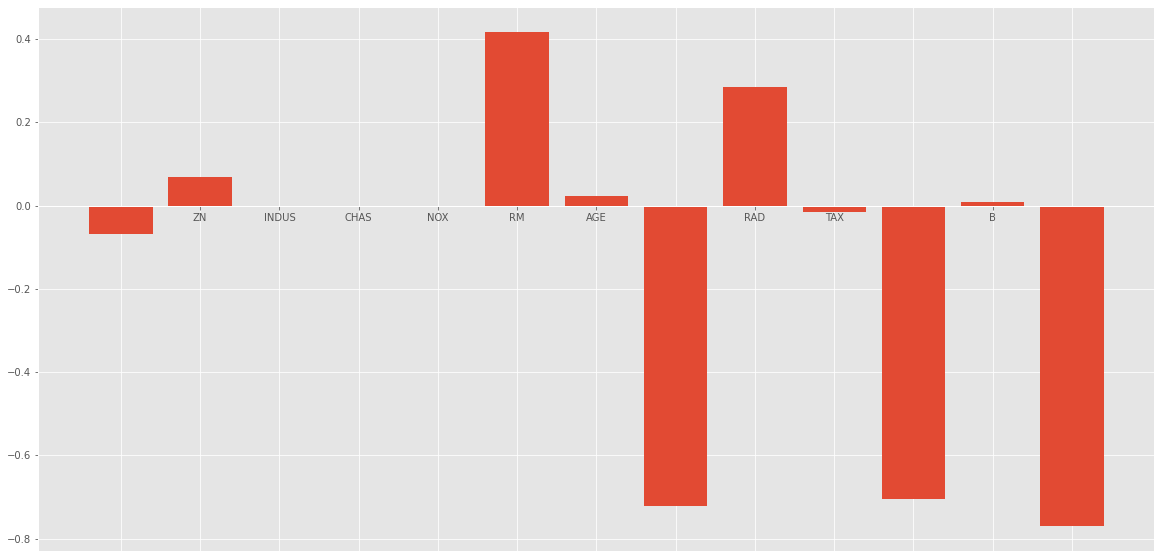

In [46]:
# ploting the coefficien score of Lasso
fig, ax = plt.subplots(figsize = (20, 10))

ax.bar(lasso_coeff["Columns1"], lasso_coeff['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()
    